In [1]:
pip install yfinance


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# set plot style 
sns.set(style="darkgrid")

In [4]:
ticker = 'AAPL'
start_date = '2025-01-10'
end_data = '2025-12-30'

df = yf.download(ticker, start=start_date, end=end_data)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-10,236.280029,239.582061,232.439288,239.432413,61710900
2025-01-13,233.835922,234.105277,229.167192,232.968021,49630700
2025-01-14,232.718613,235.551775,231.910564,234.185076,39435300
2025-01-15,237.297562,238.384950,233.865838,234.075339,39832000
2025-01-16,227.710693,237.437230,227.481251,236.778830,71759100


In [5]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2025-01-10 to 2025-06-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   99 non-null     float64
 1   (High, AAPL)    99 non-null     float64
 2   (Low, AAPL)     99 non-null     float64
 3   (Open, AAPL)    99 non-null     float64
 4   (Volume, AAPL)  99 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 4.6 KB


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,99.000000,99.000000,99.000000,99.000000,9.900000e+01
mean,217.844145,220.704271,214.558552,217.460494,5.873310e+07
std,17.030615,16.461544,17.507158,17.324549,2.656845e+07
min,172.194199,190.090729,168.988411,171.724805,1.872928e+07
25%,202.589340,206.879457,200.925779,204.895833,4.436655e+07
50%,217.614624,221.189936,214.628550,216.725791,5.134390e+07
75%,232.688690,235.701249,229.048491,232.504138,6.395115e+07
max,246.776398,249.672591,244.898854,247.675211,1.843959e+08


In [8]:
df.columns.tolist()

[('Close', 'AAPL'),
 ('High', 'AAPL'),
 ('Low', 'AAPL'),
 ('Open', 'AAPL'),
 ('Volume', 'AAPL')]

## visulaize closing price over time

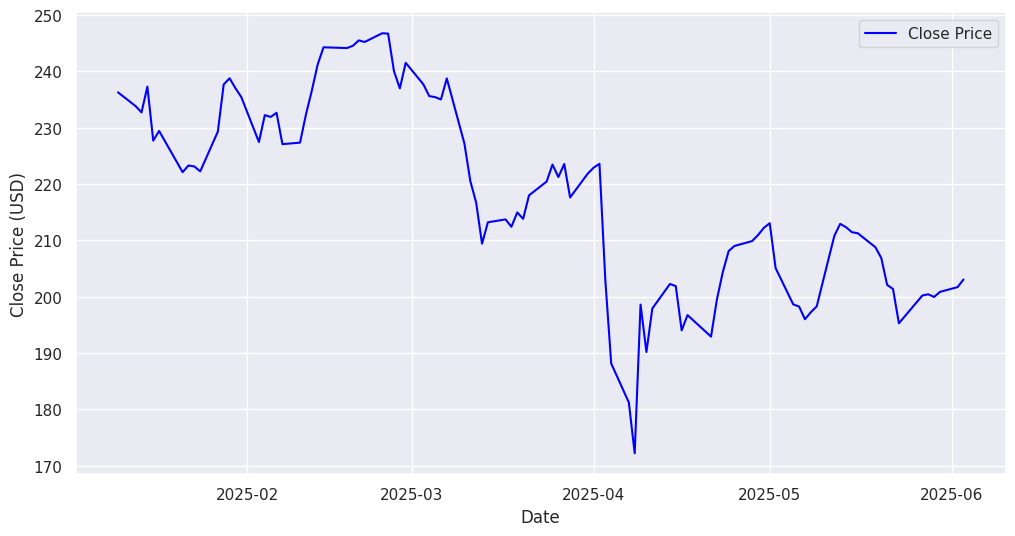

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)") 
plt.legend()
plt.show()

## moving average (30 & 100 days)

In [10]:
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA100'] = df['Close'].rolling(window=100).mean() 

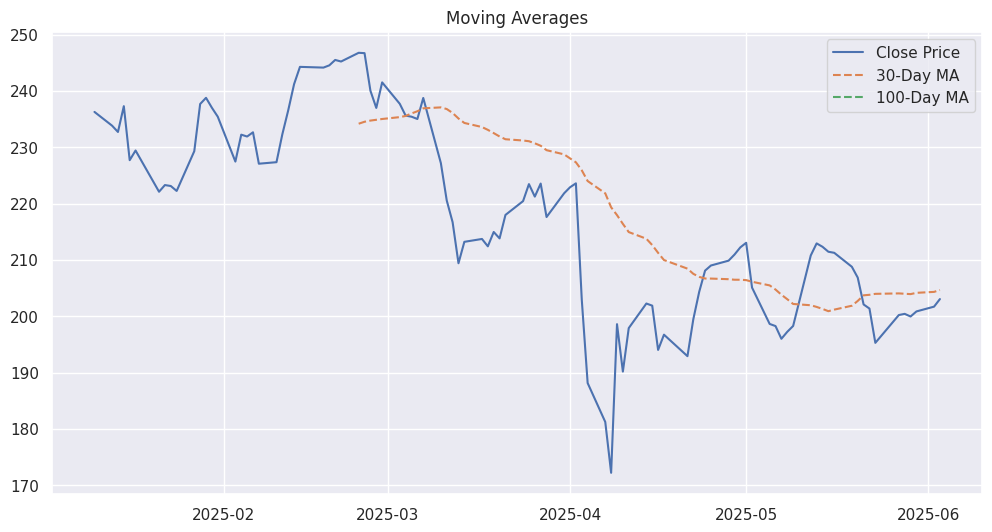

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label= "Close Price")
plt.plot(df['MA30'], label= '30-Day MA', linestyle= '--')
plt.plot(df['MA100'], label= '100-Day MA', linestyle= '--')
plt.title("Moving Averages")
plt.legend() 
plt.show()

## volume traded over time

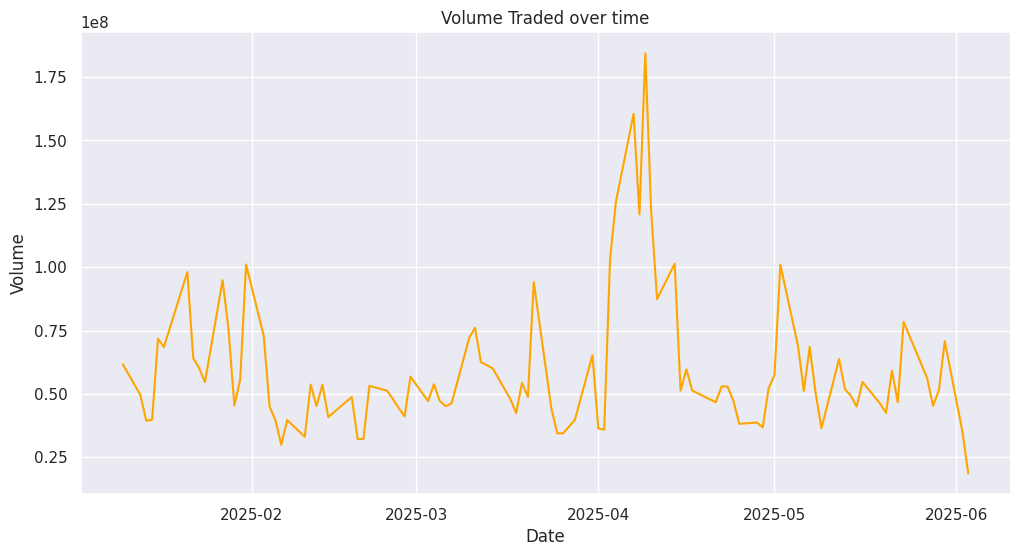

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], color='orange')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Volume Traded over time")
plt.show()

## Daily Returns

In [14]:
df['Daily Return (%)'] = df['Close'].pct_change() * 100

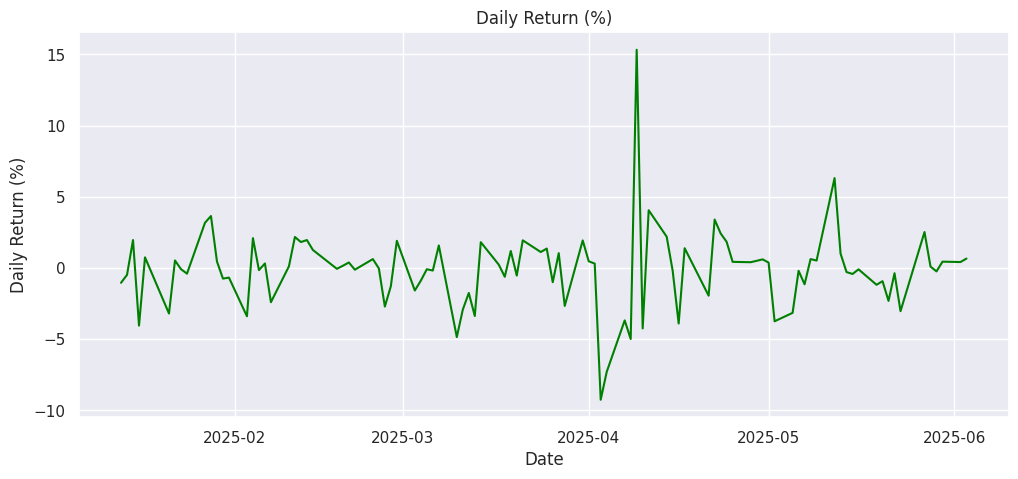

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df['Daily Return (%)'], color= 'green')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Return (%)')
plt.show()

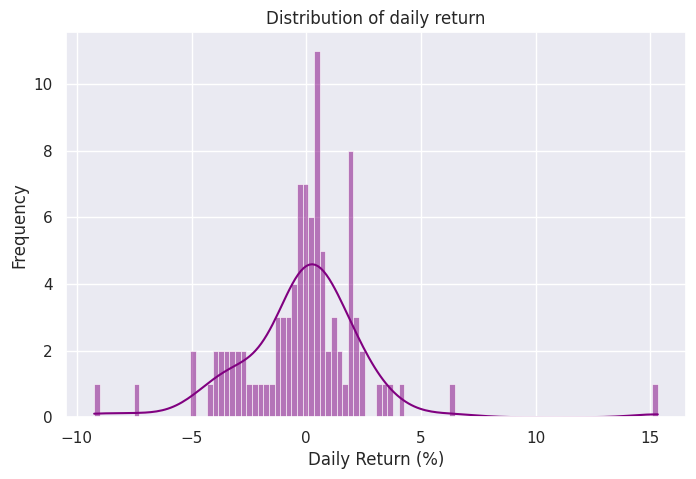

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Daily Return (%)'].dropna(), bins=100, kde= True, color= 'purple')
plt.title("Distribution of daily return")
plt.xlabel('Daily Return (%)') 
plt.ylabel('Frequency')
plt.show()

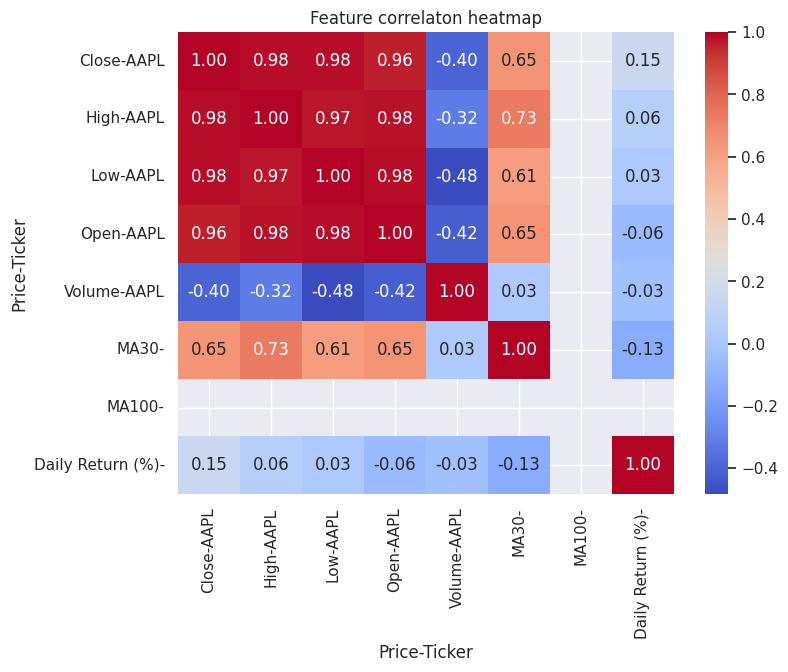

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Feature correlaton heatmap')
plt.show()

In [18]:
df = df.reset_index()

In [19]:
df['date_ordinal'] = pd.to_datetime(df['Date']).map(pd.Timestamp.toordinal)

x = df[['date_ordinal']]
y = df['Close']

In [20]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

# Training model

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train , y_train)*100, lr.score(x_test, y_test)*100

(55.08310191819883, 62.107586565482606)

In [23]:
mse_lr = mean_squared_error(y_test, lr.predict(x_test))
r2_lr = r2_score(y_test, lr.predict(x_test))
mse_lr, r2_lr

(80.54275013087336, 0.6210758656548261)

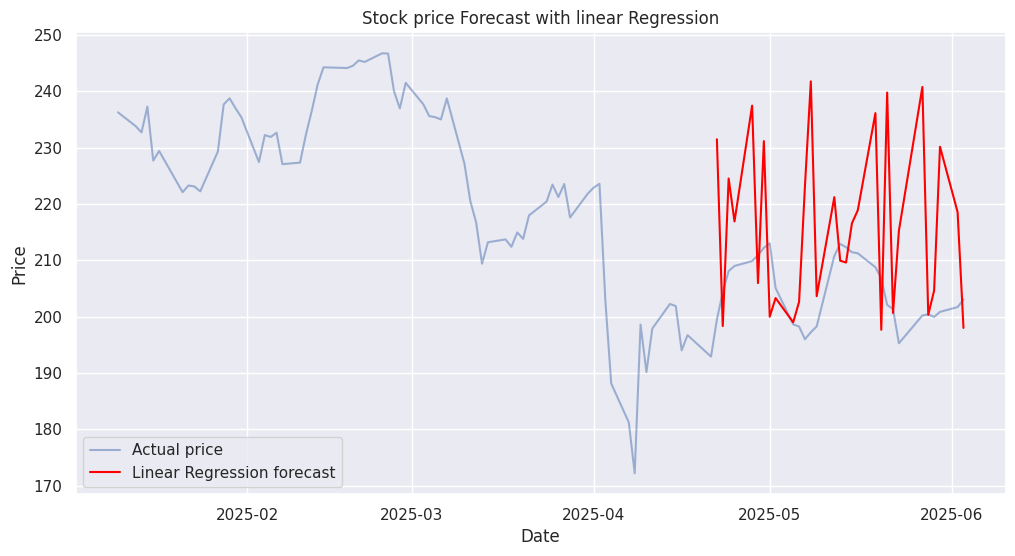

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label= 'Actual price', alpha= 0.5)
plt.plot(df['Date'].iloc[len(x_train):], lr.predict(x_test), label= 'Linear Regression forecast', color= 'red')
plt.title('Stock price Forecast with linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## lasso and ridge regression

In [25]:
ri = Ridge()
ri.fit(x_train, y_train)
ri.score(x_train, y_train)*100, ri.score(x_test, y_test)*100

(55.07019274531323, 62.661540147766495)

In [26]:
mean_squared_error(y_test, ri.predict(x_test)), r2_score(y_test, ri.predict(x_test))

(79.36528633487903, 0.6266154014776649)

In [27]:
la = Lasso()
la.fit(x_train, y_train)
la.score(x_train, y_train)*100, la.score(x_test, y_test)*100

(54.74520477921387, 64.43304604429385)

In [28]:
mean_squared_error(y_test, la.predict(x_test)), r2_score(y_test, la.predict(x_test))

(75.59983716321453, 0.6443304604429385)

In [29]:
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.5, 1]
,    'kernel': ['rbf', 'linear']
}

In [30]:
svr = SVR()
grid_svr = GridSearchCV(svr, param_grid, cv = 5, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_svr.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'epsilon': [0.1, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
grid_svr.best_estimator_

SVR(C=100, epsilon=1)

In [32]:
grid_svr.best_params_

{'C': 100, 'epsilon': 1, 'kernel': 'rbf'}

In [33]:
svr_prd = grid_svr.predict(x_test)

In [34]:
mean_squared_error(y_test, svr_prd)

79.797366582909

In [35]:
r2_score(y_test, svr_prd)*100

62.4582622193541

## random forest regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [38]:
rf.fit(x_train, y_train)
rf.score(x_train, y_train) * 100, rf.score(x_train, y_train)*100

/home/sabin/myenv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(98.41095988598894, 98.41095988598894)

In [39]:
mean_squared_error(y_test, rf.predict(x_test))

17.649675003809776

In [40]:
r2_score(y_test, rf.predict(x_test))

0.9169647446675813

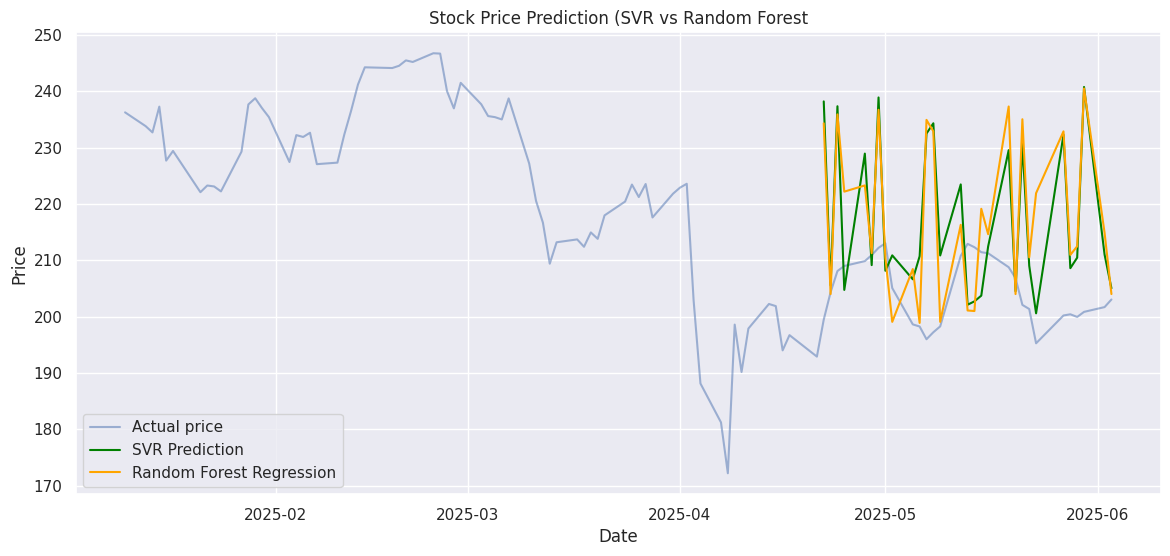

In [41]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label = 'Actual price', alpha = 0.5)
plt.plot(df['Date'].iloc[len(x_train):], svr_prd, label = "SVR Prediction", color= 'green')
plt.plot(df['Date'].iloc[len(x_train):], rf.predict(x_test), label = "Random Forest Regression", color= 'orange')
plt.title("Stock Price Prediction (SVR vs Random Forest")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.show()